In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
from pathlib import Path
from tqdm.auto import tqdm
import torch
from torch import nn
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchinfo import summary
print(torch.__version__)


1.13.0


# **About Dataset**
**Overview**

We have created a 102 category dataset, consisting of 102 flower categories. The flowers chosen to be flower commonly occuring in the United Kingdom. Each class consists of between 40 and 258 images. The details of the categories and the number of images for each class can be found on this category statistics page.

The images have large scale, pose and light variations. In addition, there are categories that have large variations within the category and several very similar categories. The dataset is visualized using isomap with shape and colour features.

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
image_path = Path('/kaggle/input/pytorch-challange-flower-dataset/dataset/')
train_dir = image_path / "train"
valid_dir = image_path / "valid"
test_dir = image_path / "test"

train_dir, valid_dir, test_dir

(PosixPath('/kaggle/input/pytorch-challange-flower-dataset/dataset/train'),
 PosixPath('/kaggle/input/pytorch-challange-flower-dataset/dataset/valid'),
 PosixPath('/kaggle/input/pytorch-challange-flower-dataset/dataset/test'))

# Basic EDA

In [4]:
with open('../input/pytorch-challange-flower-dataset/cat_to_name.json') as f:
    cat_to_name = json.load(f)

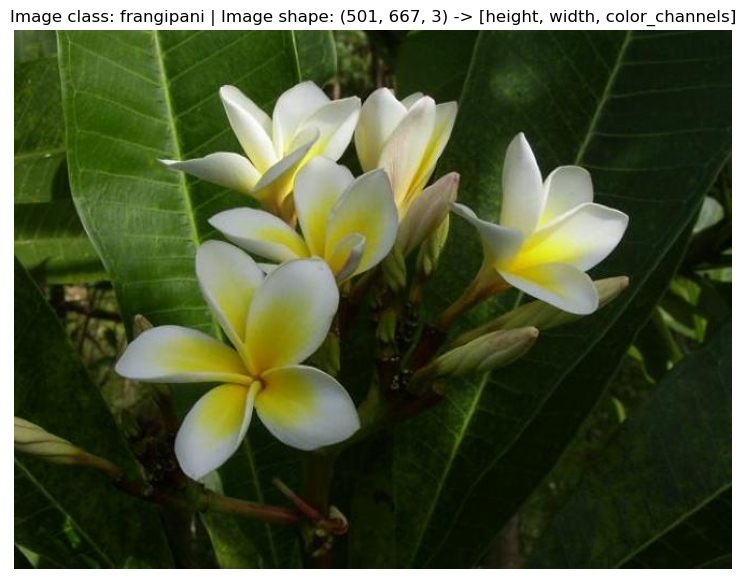

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#get all image path
image_path_list = list(image_path.glob("*/*/*.jpg"))

#get random image path
random_image_path = random.choice(image_path_list)

#get image class from path name
image_class = random_image_path.parent.stem

#open image
img = Image.open(random_image_path)

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {cat_to_name[str(image_class)]} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)
plt.show()

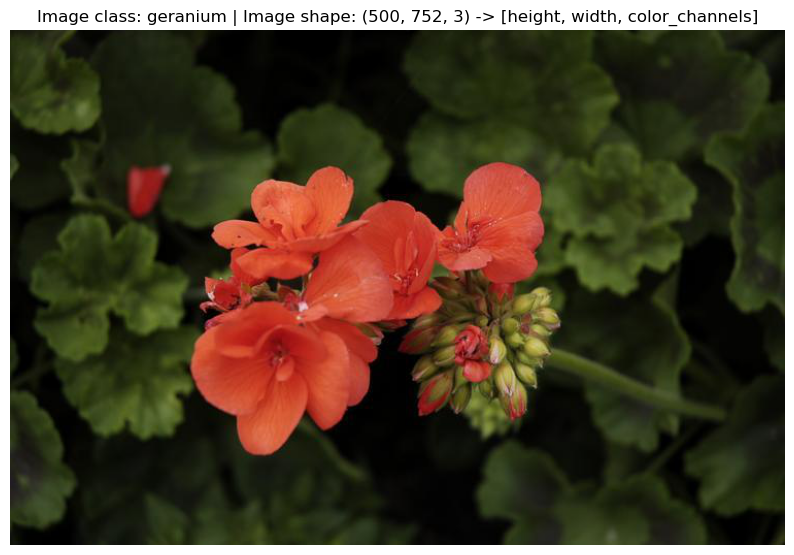

In [29]:
#get all image path
image_path_list = list(image_path.glob("*/*/*.jpg"))

#get random image path
random_image_path = random.choice(image_path_list)

#get image class from path name
image_class = random_image_path.parent.stem

#open image
img = Image.open(random_image_path)

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {cat_to_name[str(image_class)]} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)
plt.show()

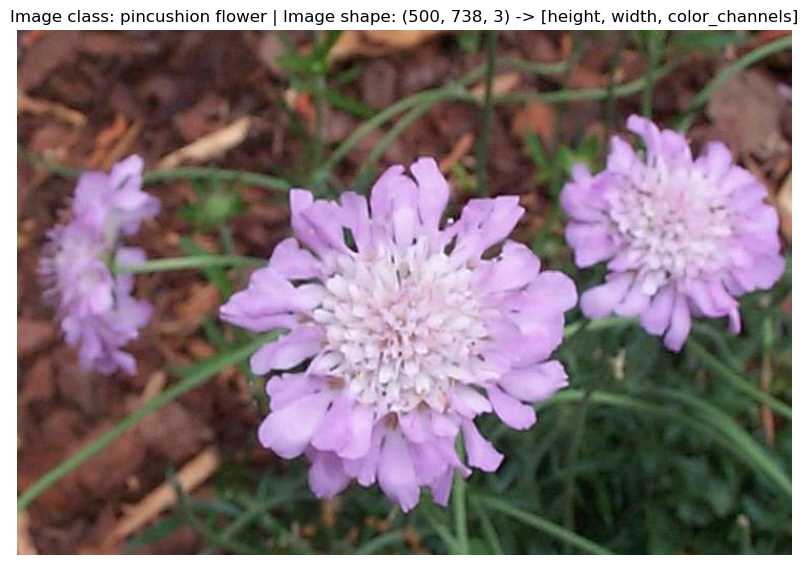

In [30]:
#get all image path
image_path_list = list(image_path.glob("*/*/*.jpg"))

#get random image path
random_image_path = random.choice(image_path_list)

#get image class from path name
image_class = random_image_path.parent.stem

#open image
img = Image.open(random_image_path)

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {cat_to_name[str(image_class)]} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)
plt.show()

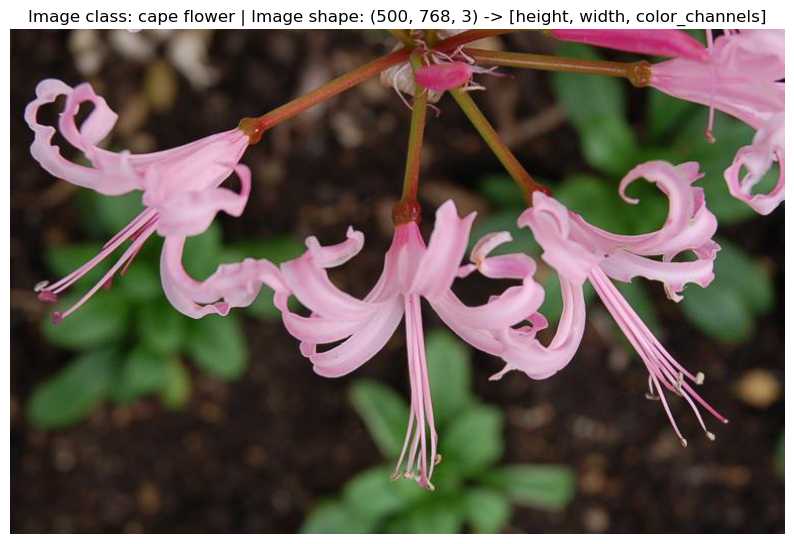

In [31]:
#get all image path
image_path_list = list(image_path.glob("*/*/*.jpg"))

#get random image path
random_image_path = random.choice(image_path_list)

#get image class from path name
image_class = random_image_path.parent.stem

#open image
img = Image.open(random_image_path)

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {cat_to_name[str(image_class)]} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)
plt.show()

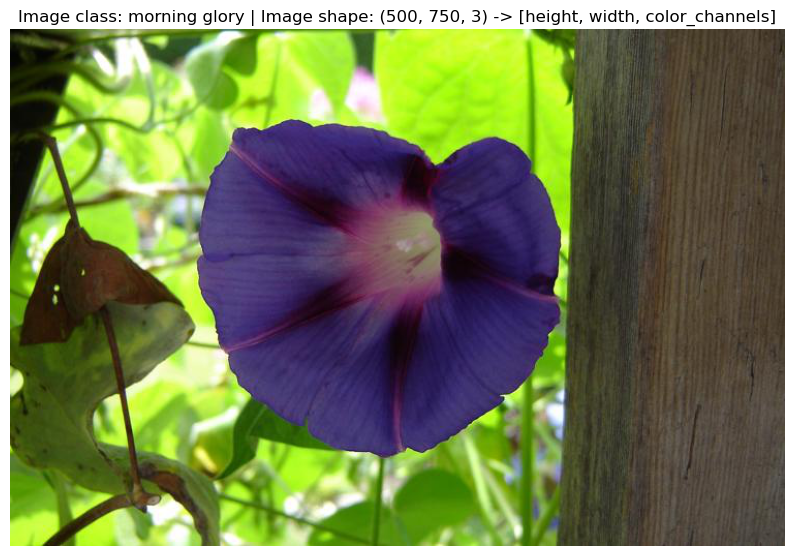

In [32]:
#get all image path
image_path_list = list(image_path.glob("*/*/*.jpg"))

#get random image path
random_image_path = random.choice(image_path_list)

#get image class from path name
image_class = random_image_path.parent.stem

#open image
img = Image.open(random_image_path)

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {cat_to_name[str(image_class)]} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)
plt.show()

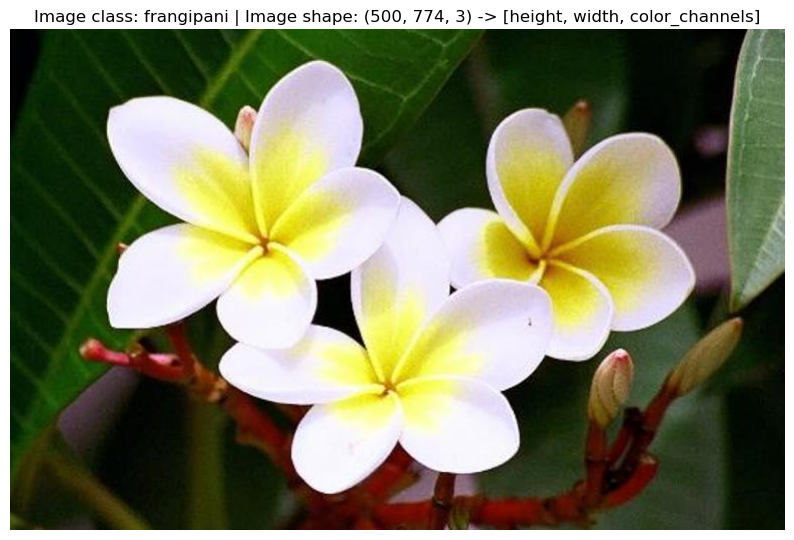

In [33]:
#get all image path
image_path_list = list(image_path.glob("*/*/*.jpg"))

#get random image path
random_image_path = random.choice(image_path_list)

#get image class from path name
image_class = random_image_path.parent.stem

#open image
img = Image.open(random_image_path)

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {cat_to_name[str(image_class)]} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)
plt.show()

# Data Processing

In [6]:
from torchvision.models import resnet50, ResNet50_Weights
weight = ResNet50_Weights.DEFAULT
auto_transform = weight.transforms()
auto_transform

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [7]:
NUM_WORKERS = os.cpu_count()
def create_dataloader(
    train_dir: str,
    valid_dir: str,
    transforms: transforms.Compose,
    batch_size: int,
    num_workers: int= NUM_WORKERS
):
    train_data = datasets.ImageFolder(train_dir, transform=transforms)
    valid_data = datasets.ImageFolder(valid_dir, transform=transforms)
    
    class_names = train_data.classes
    
    train_dataloader = DataLoader(train_data,
                                 batch_size=batch_size,
                                 shuffle=True,
                                 num_workers=num_workers,
                                 pin_memory=True)
    valid_dataloader = DataLoader(valid_data,
                                batch_size=batch_size,
                                shuffle=False,
                                num_workers=num_workers,
                                pin_memory=True)
    return train_dataloader, valid_dataloader, class_names

In [8]:
train_dataloader, valid_dataloader, class_names = create_dataloader(train_dir, valid_dir, auto_transform, 128, NUM_WORKERS)

# Model bulding with ResNet50 pretrain

In [9]:
model = resnet50(weights=ResNet50_Weights.DEFAULT).to(device)

for param in model.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [10]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)

output_shape = len(class_names)

model.fc = torch.nn.Linear(in_features=2048, 
                    out_features=output_shape,
                    bias=True).to(device)

In [11]:
summary(model=model,
       input_size=(128,3,244,244),
       verbose=0,
       col_names=["input_size", 'output_size', 'num_params', 'trainable'],
       col_width=20,
       row_settings=['var_names'])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [128, 3, 244, 244]   [128, 102]           --                   Partial
├─Conv2d (conv1)                         [128, 3, 244, 244]   [128, 64, 122, 122]  (9,408)              False
├─BatchNorm2d (bn1)                      [128, 64, 122, 122]  [128, 64, 122, 122]  (128)                False
├─ReLU (relu)                            [128, 64, 122, 122]  [128, 64, 122, 122]  --                   --
├─MaxPool2d (maxpool)                    [128, 64, 122, 122]  [128, 64, 61, 61]    --                   --
├─Sequential (layer1)                    [128, 64, 61, 61]    [128, 256, 61, 61]   --                   False
│    └─Bottleneck (0)                    [128, 64, 61, 61]    [128, 256, 61, 61]   --                   False
│    │    └─Conv2d (conv1)               [128, 64, 61, 61]    [128, 64, 61, 61]    (4,096)              False
│    │    

In [12]:
from timeit import default_timer as timer
def train_time(start:float, end:float, device: torch.device=None):
    total_time = end - start
    print(f"Train time on {device}: {total_time}")
    return total_time

In [13]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              device: torch.device):
    model.train()
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        #1.Forward pass
        y_pred = model(X)
        
        #2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        #3. Optimizer zero grad
        optimizer.zero_grad()
        
        #4. Loss backward
        loss.backward()
        
        #5. Optimizer loss
        optimizer.step()
        
        #calculate accuracy
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred)
    train_loss = train_loss/len(data_loader)
    train_acc = train_acc/len(data_loader)
    return train_loss, train_acc

In [14]:
def valid_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device):
    model.eval()
    
    valid_loss, valid_acc = 0, 0
    with torch.inference_mode():
        for batch, (X,y) in enumerate(data_loader):
            X, y = X.to(device), y.to(device)
            #1.Forward pass
            valid_pred = model(X)
            #2.Loss
            loss = loss_fn(valid_pred, y)
            valid_loss += loss.item()
            
            #calcute accuracy
            valid_labels = valid_pred.argmax(dim=1)
            valid_acc += ((valid_labels == y).sum().item()/len(valid_labels))
    valid_loss = valid_loss / len(data_loader)
    valid_acc = valid_acc / len(data_loader)
    return valid_loss, valid_acc            

In [15]:
def train(model: torch.nn.Module,
         train_dataloader: torch.utils.data.DataLoader,
         valid_dataloader: torch.utils.data.DataLoader,
         optimizer: torch.optim.Optimizer,
         loss_fn: torch.nn.Module,
         epochs: int,
         device: torch.device):
    results = {"train_loss": [],
               "train_acc": [],
               "valid_loss": [],
               "valid_acc": []
    }
    model.to(device)
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          data_loader = train_dataloader,
                                          loss_fn = loss_fn,
                                          optimizer = optimizer,
                                          device = device)
        valid_loss, valid_acc = valid_step(model=model,
                                       data_loader = valid_dataloader,
                                       loss_fn = loss_fn,
                                       device=device)
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"valid_loss: {valid_loss:.4f} | "
          f"valid_acc: {valid_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["valid_loss"].append(valid_loss)
        results["valid_acc"].append(valid_acc)

    return results

In [16]:
num_classes = len(class_names)

loss_fn = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = torch.optim.NAdam(model.parameters(), lr=0.001, weight_decay=2e-05)

In [17]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

start_time = timer()

result = train(model=model,
         train_dataloader= train_dataloader,
         valid_dataloader= valid_dataloader,
         optimizer=optimizer,
         loss_fn=loss_fn,
         epochs=15,
         device=device)
end_time = timer()
train_time(start_time, end_time, device=device)

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 3.7051 | train_acc: 0.3466 | valid_loss: 2.8809 | valid_acc: 0.6602
Epoch: 2 | train_loss: 2.2898 | train_acc: 0.8348 | valid_loss: 2.0190 | valid_acc: 0.8622
Epoch: 3 | train_loss: 1.6412 | train_acc: 0.9420 | valid_loss: 1.6412 | valid_acc: 0.8923
Epoch: 4 | train_loss: 1.3564 | train_acc: 0.9695 | valid_loss: 1.4703 | valid_acc: 0.9137
Epoch: 5 | train_loss: 1.2109 | train_acc: 0.9851 | valid_loss: 1.3753 | valid_acc: 0.9221
Epoch: 6 | train_loss: 1.1269 | train_acc: 0.9893 | valid_loss: 1.3150 | valid_acc: 0.9254
Epoch: 7 | train_loss: 1.0760 | train_acc: 0.9939 | valid_loss: 1.2880 | valid_acc: 0.9379
Epoch: 8 | train_loss: 1.0397 | train_acc: 0.9956 | valid_loss: 1.2615 | valid_acc: 0.9406
Epoch: 9 | train_loss: 1.0071 | train_acc: 0.9979 | valid_loss: 1.2320 | valid_acc: 0.9395
Epoch: 10 | train_loss: 0.9886 | train_acc: 0.9982 | valid_loss: 1.2287 | valid_acc: 0.9496
Epoch: 11 | train_loss: 0.9675 | train_acc: 0.9988 | valid_loss: 1.2106 | valid_acc: 0.94

540.7912778269999

In [18]:
model_df = pd.DataFrame(result)

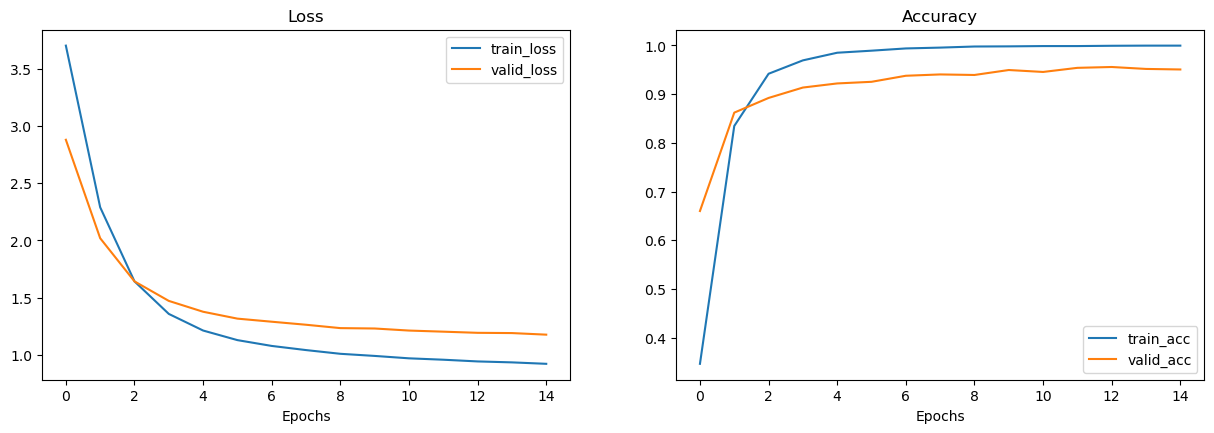

In [19]:
# Setup a plot 
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_df["train_loss"], label="train_loss")
plt.plot(epochs, model_df["valid_loss"], label="valid_loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_df["train_acc"], label="train_acc")
plt.plot(epochs, model_df["valid_acc"], label="valid_acc")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend();

In [20]:
# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("/kaggle/working/")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "oxford_102_flower.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: /kaggle/working/oxford_102_flower.pth


In [21]:
custom_image_path = test_dir / "image_00520.jpg"

In [22]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255. 

In [23]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
])
custom_image_transformed = custom_image_transform(custom_image)

In [24]:
model.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
    
    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")
    
    # Make a prediction on image with an extra dimension
    custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 224, 224])
Unsqueezed custom image shape: torch.Size([1, 3, 224, 224])


In [25]:
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)

In [26]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'88'

In [27]:
from typing import List
def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names: List[str] = None, 
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""
    
    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255. 
    
    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)
    
    # 4. Make sure the model is on the target device
    model.to(device)
    
    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)
    
        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))
        
    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {cat_to_name[str(class_names[target_image_pred_label.cpu()])]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {cat_to_name[str(target_image_pred_label)]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

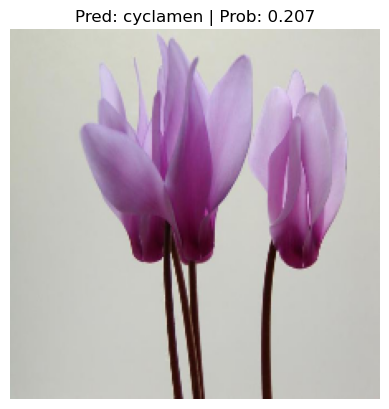

In [35]:
# Pred on our custom image
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)